# Chapter 1_2 方差分析
----
author: W.Y.  
first_edition: 2020/1/1  
last_edition: 2020/1/15  
description: 王汉生老师书的第二章，方差分析的python极简实现  

----

In [2]:
# 导入模块
import pandas as pd  
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt  # 画图模块
import matplotlib
import statsmodels.formula.api as smf  # 基于公式的统计模型API接口
import statsmodels.api as sma
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # 多重比较的包
import lmdiag  # 画模型诊断图的模块

In [6]:
# 导入数据之导入csv文件 

data_real = pd.read_csv('E:\Data Mining\LearningPython\Chapter 1 从R到Python\CH 1_2 方差分析\CH 1_2 data real.csv', encoding='gbk')  # NOTE
data_new = pd.read_csv('E:\Data Mining\LearningPython\Chapter 1 从R到Python\CH 1_2 方差分析\CH 1_2 data new.csv', encoding='gbk')

**NOTE**

>因为文件中出现了中文，所以需要修改编码格式，用`encoding='gbk'`

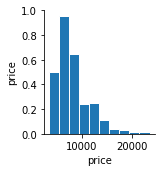

In [7]:
g = sns.PairGrid(data_real.iloc[:,0:6])
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)

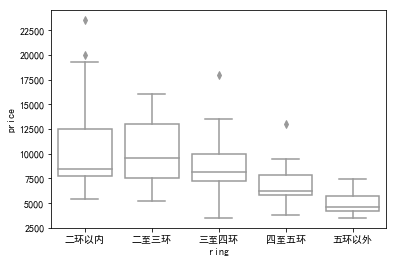

In [4]:
# 描述性分析 箱图
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 为了画图能够显示中文，否则中文会变成乱码。

sns.boxplot(x='ring',y='price',data=data_real, color='white',
           order=['二环以内', '二至三环', '三至四环', '四至五环', '五环以外'])  # order设置顺序，可以试试不加order的效果

In [33]:
data_real['log_price'] = np.log(data_real['price'])  # 常规操作，取哈对数

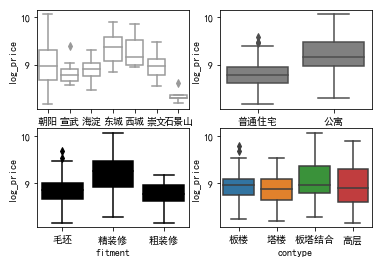

In [34]:
# 描述性分析 箱图 （多图一起画）
sns.boxplot(x=data_real['dis'],y=data_real['log_price'], color='white', 
            ax=plt.subplot(2,2,1))  # 设置2×2的画布，选定第1副子图，即第一行第一个。下同
sns.boxplot(x=data_real['wuye'],y=data_real['log_price'], color='grey', ax=plt.subplot(2,2,2))
sns.boxplot(x=data_real['fitment'],y=data_real['log_price'], color='black', ax=plt.subplot(2,2,3))
sns.boxplot(x=data_real['contype'],y=data_real['log_price'], ax=plt.subplot(2,2,4))

In [35]:
# 单因素方差分析

anova_1 = smf.ols('log_price ~ C(ring)', data=data_real).fit()
print(sma.stats.anova_lm(anova_1, typ=3))   # typ=3就是R中的type='III'

                sum_sq     df             F         PR(>F)
Intercept  3420.771587    1.0  39352.634271  6.554708e-227
C(ring)       9.965243    4.0     28.660096   9.752385e-19
Residual     16.950592  195.0           NaN            NaN


note: 公式中的`C(ring)`类似R中的`as.factor(ring)`。本案例中是字符串型的数据，所以加不加无所谓，
如果是数值型的分类数据，比如编码为1、2、3等，则需要加上`C()`，否则会视为连续变量。

In [21]:
# 查看具体每个水平的情况
print(anova_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     20.51
Date:                Sat, 11 Jan 2020   Prob (F-statistic):           4.03e-14
Time:                        20:44:38   Log-Likelihood:                -1869.9
No. Observations:                 200   AIC:                             3750.
Df Residuals:                     195   BIC:                             3766.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        8704.2381    434.642     

In [37]:
# 多重比较
compare_1 = pairwise_tukeyhsd(data_real['log_price'], data_real['ring'])
print(compare_1.summary())   # reject = True就是拒绝原假设，说明两组差异显著。

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 三至四环   二环以内   0.1263  -0.0625  0.3152 False 
 三至四环   二至三环   0.1315   -0.04   0.3031 False 
 三至四环   五环以外  -0.5192  -0.7269 -0.3114  True 
 三至四环   四至五环  -0.2493   -0.417 -0.0815  True 
 二环以内   二至三环   0.0052  -0.1784  0.1888 False 
 二环以内   五环以外  -0.6455  -0.8633 -0.4277  True 
 二环以内   四至五环  -0.3756  -0.5556 -0.1956  True 
 二至三环   五环以外  -0.6507  -0.8537 -0.4477  True 
 二至三环   四至五环  -0.3808  -0.5426  -0.219  True 
 五环以外   四至五环   0.2699   0.0702  0.4696  True 
---------------------------------------------


In [39]:
# 多因素方差分析 （书里太啰嗦啦，直接多因素，就包括了单因素、双因素和交互作用啦）

anova_2 = smf.ols('log_price ~ C(dis)*C(ring) + C(wuye) + C(fitment) +'
                  'C(contype)', data=data_real).fit()

# 没错！看到了熟悉了*号，和R一样，也是用*来分析交互作用的

print(sma.stats.anova_lm(anova_2, typ=3))

                    sum_sq     df             F         PR(>F)
Intercept       510.497141    1.0  12002.974868  3.638466e-163
C(dis)           28.598952    6.0    112.071310   2.859013e-57
C(ring)          15.856301    4.0     93.204628   2.613480e-42
C(wuye)           0.884515    1.0     20.797009   9.568715e-06
C(fitment)        1.217174    2.0     14.309297   1.755108e-06
C(contype)        0.045836    3.0      0.359236   7.825173e-01
C(dis):C(ring)   81.033584   24.0     79.387000   5.187711e-68
Residual          7.442905  175.0           NaN            NaN


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 14
  'rank is %d' % (J, J_), ValueWarning)


In [40]:
print(anova_2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     19.08
Date:                Sat, 11 Jan 2020   Prob (F-statistic):           5.03e-37
Time:                        21:13:35   Log-Likelihood:                 45.318
No. Observations:                 200   AIC:                            -40.64
Df Residuals:                     175   BIC:                             41.82
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


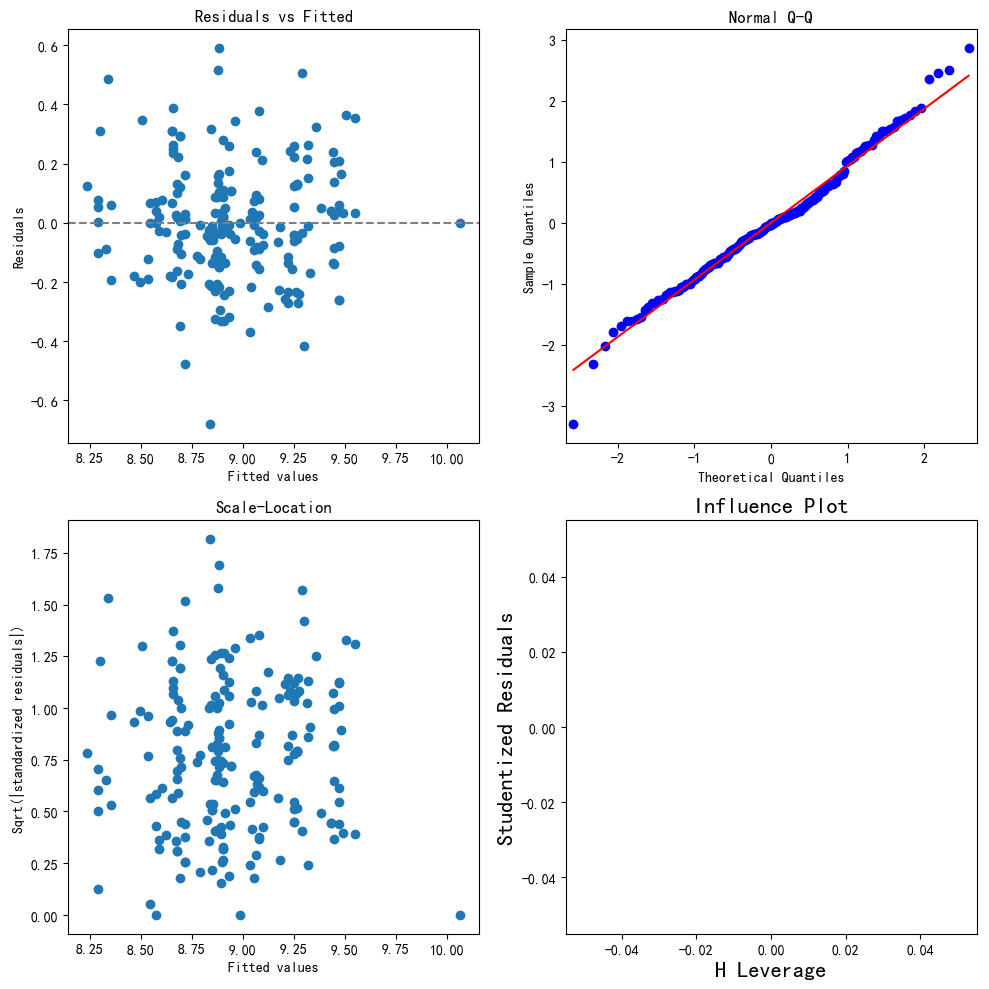

In [57]:
# 模型诊断
plt.rcParams['axes.unicode_minus']=False  # 正常显示负号

fig = plt.figure(figsize = (10, 10), dpi = 100)


ax1 = fig.add_subplot(2,2,1)
plt.plot(anova_2.predict(), anova_2.resid, 'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

ax2 = fig.add_subplot(2, 2, 2)
sma.qqplot(anova_2.resid_pearson, line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(anova_2.predict(), abs(anova_2.resid_pearson)**.5,  'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')
 
ax4 = fig.add_subplot(2, 2, 4)
sma.graphics.influence_plot(anova_2, criterion='Cooks', ax=ax4)

plt.tight_layout()

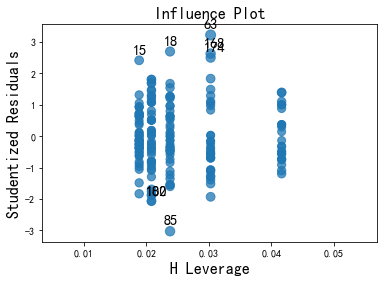

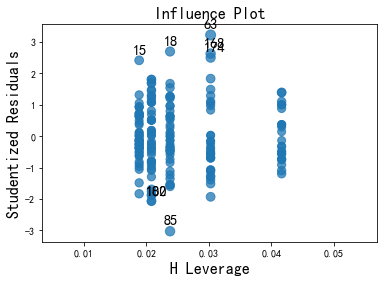

In [60]:
sma.graphics.influence_plot(anova_1, criterion='Cooks', size=10)

In [80]:
import plotDiagnostic
plotDiagnostic.diagnostic_plots(X=data_real['ring'], y=data_real['log_price'], model_fit=anova_1)

TypeError: diagnostic_plots() got an unexpected keyword argument 'X'